In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
profs = pd.read_csv("profs.csv")

In [9]:
profs

Unnamed: 0.1  Unnamed: 0 __typename firstName       lastName  \
0                0           0    Teacher    Robert         Borgen   
1                1           1    Teacher      Aram       Yengoyan   
2                2           2    Teacher   Patrick  Carroll-Burke   
3                3           3    Teacher     Henry        McHenry   
4                4           4    Teacher     Peter         Rodman   
...            ...         ...        ...       ...            ...   
3926          4465        4465    Teacher        Fu            Liu   
3927          4466        4466    Teacher     David           Lang   
3928          4467        4467    Teacher    Abhaya       Dandekar   
3929          4468        4468    Teacher      Dina    Zhabinskaya   
3930          4469        4469    Teacher       Sam          Blitz   

                department                    id  legacyId  numRatings  \
0                Languages      VGVhY2hlci05NTY2      9566          39   
1             Anthropology      VGVhY2hlci05NTY4      9568          47   
2           Social Science      VGVhY2hlci05NTcw      9570          13   
3             Anthropology  VGVhY2hlci0xMzQ4MQ==     13481         124   
4             Anthropology  VGVhY2hlci0yMjIzMA==     22230          73   
...                    ...                   ...       ...         ...   
3926           Mathematics  VGVhY2hlci05NTY1OTg=    956598         127   
3927             Economics  VGVhY2hlci0xNDczOTYz   1473963         202   
3928  Plant & Soil Science  VGVhY2hlci0xODM5MDQx   1839041           7   
3929               Physics  VGVhY2hlci0xOTgzMDky   1983092          89   
3930               Physics  VGVhY2hlci0yMzg3Mzg4   2387388          85   

      avgRating  avgDifficulty  
0           3.3            2.9  
1           2.6            2.7  
2           3.2            3.1  
3           4.5            2.5  
4           3.8            3.6  
...         ...            ...  
3926        2.5            4.2  
3927        3.6            3.8  
3928        3.5            2.6  
3929        2.8            4.2  
3930        3.3            4.3  

[3931 rows x 11 columns]

In [10]:
# mean number of ratings
profs['numRatings'].mean()

20.91859577715594

<AxesSubplot:>

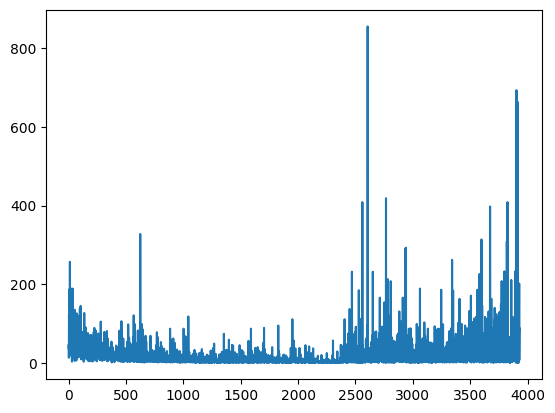

In [11]:
# quick plot of ratings
profs['numRatings'].plot()

In [12]:
# prof with most ratings
profs.loc[profs['numRatings'].idxmax()]

Unnamed: 0.1                     3019
Unnamed: 0                       3019
__typename                    Teacher
firstName                     Andreas
lastName                   Toupadakis
department                  Chemistry
id               VGVhY2hlci01NjE1OTk=
legacyId                       561599
numRatings                        856
avgRating                         3.3
avgDifficulty                     3.1
Name: 2606, dtype: object

<AxesSubplot:xlabel='avgRating', ylabel='Count'>

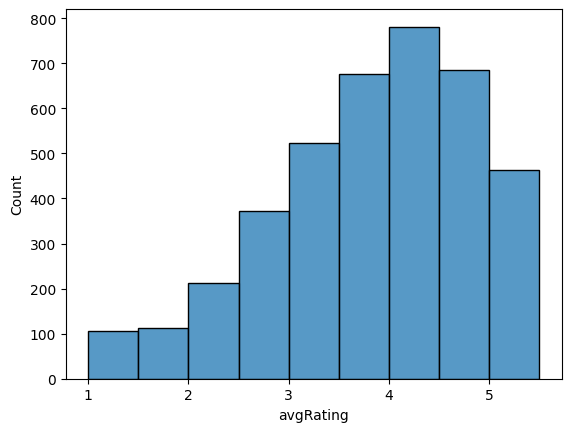

In [14]:
# histogram of average rating
sns.histplot(profs['avgRating'], binwidth=0.5)

<AxesSubplot:xlabel='avgDifficulty', ylabel='Count'>

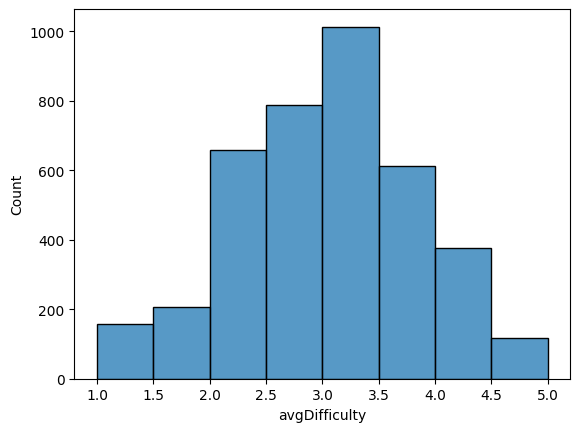

In [15]:
# histogram of average difficulty rating
sns.histplot(profs['avgDifficulty'], binwidth=0.5)

<AxesSubplot:xlabel='avgDifficulty', ylabel='avgRating'>

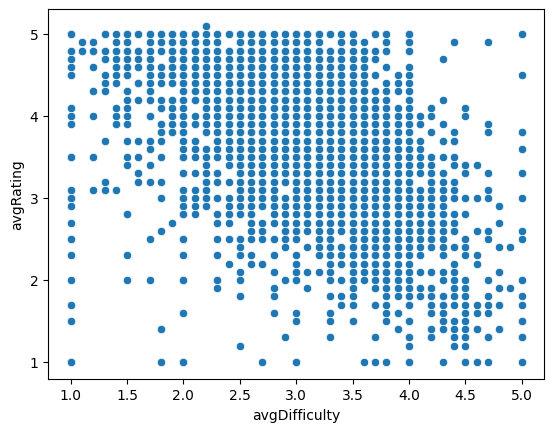

In [16]:
# scatterplot rating vs difficulty
sns.scatterplot(profs, x=profs['avgDifficulty'], y=profs['avgRating'])

In [17]:
# correlation
corr = profs['avgRating'].corr(profs['avgDifficulty'])
print("Correlation between average rating and average dificulty is: ", corr)

Correlation between average rating and average dificulty is:  -0.5175470483184978


In [38]:
# average rating by department
rating_by_dept = profs.groupby('department')['avgRating'].mean()
rating_by_dept = pd.DataFrame({'department': rating_by_dept.index, 'avgRating': rating_by_dept.values})
rating_by_dept['avgRating'] = rating_by_dept['avgRating'].round(decimals=2)
rating_by_dept

department  avgRating
0                           Accounting       4.00
1                              Advisor       3.40
2             African-American Studies       3.92
3     Agricultural  Resource Economics       3.10
4    Agricultural & Resource Economics       2.96
..                                 ...        ...
147                           Wildlife       4.20
148                              Women       3.20
149                    Women's Studies       3.90
150                           Workload       1.40
151                            Writing       4.01

[152 rows x 2 columns]

<AxesSubplot:xlabel='department', ylabel='avgRating'>

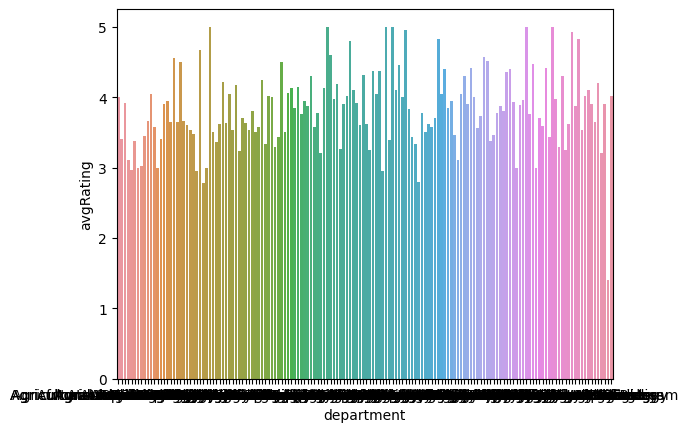

In [40]:
# rating by dept barplot
sns.barplot(rating_by_dept, x=rating_by_dept['department'], y=rating_by_dept['avgRating'])

In [39]:
# count number of unique departments
rating_by_dept['department'].nunique()


152

In [41]:
# average difficulty by department
diff_by_dept = profs.groupby('department')['avgDifficulty'].mean()
diff_by_dept = pd.DataFrame({'department': diff_by_dept.index, 'avgDifficulty': diff_by_dept.values})
diff_by_dept['avgDifficulty'] = diff_by_dept['avgDifficulty'].round(decimals=2)
diff_by_dept

department  avgDifficulty
0                           Accounting           2.70
1                              Advisor           2.55
2             African-American Studies           2.58
3     Agricultural  Resource Economics           3.75
4    Agricultural & Resource Economics           3.85
..                                 ...            ...
147                           Wildlife           2.90
148                              Women           3.00
149                    Women's Studies           2.90
150                           Workload           4.60
151                            Writing           2.80

[152 rows x 2 columns]

In [47]:
# sort by rating
rating_by_dept.sort_values('avgRating', ascending=False)

department  avgRating
82      Landscape Architecture  Regional Planning       5.00
84   Landscape Architecture amp Regional Planning       5.00
28                    Cell Biology & Neuroanatomy       5.00
133                              Student Services       5.00
125                                       Russian       5.00
..                                            ...        ...
81                    Land, Air & Water Resources       2.95
24                         Biomedical Engineering       2.95
92                             Managerial Science       2.80
26                                       Business       2.78
150                                      Workload       1.40

[152 rows x 2 columns]

<AxesSubplot:xlabel='department', ylabel='avgDifficulty'>

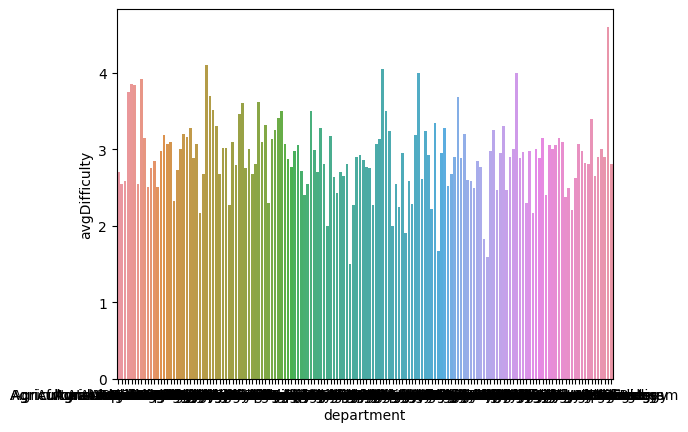

In [42]:
# difficulty by dept barplot
sns.barplot(diff_by_dept, x=diff_by_dept['department'], y=diff_by_dept['avgDifficulty'])

In [44]:
# department with highest difficulty
diff_by_dept.loc[diff_by_dept['avgDifficulty'].idxmax()]

# what the heck is the Workload dept??

department       Workload
avgDifficulty         4.6
Name: 150, dtype: object

In [46]:
# sort by difficulty
diff_by_dept.sort_values('avgDifficulty', ascending=False)

department  avgDifficulty
150                     Workload           4.60
27    Cell Biology  Neuroanatomy           4.10
81   Land, Air & Water Resources           4.05
122                     Pomology           4.00
92            Managerial Science           4.00
..                           ...            ...
88               Learning Center           1.90
112                  Physical Ed           1.82
98              Military Science           1.67
113           Physical Education           1.59
71                         Greek           1.50

[152 rows x 2 columns]